In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from functools import reduce

In [119]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df.head()

index  Identifier               Edition Statement  \
0      1         206                             NaN   
1      2         216                             NaN   
2      3         218                             NaN   
3      4         472                             NaN   
4      5         480  A new edition\t revised\t etc.   

                      Place         Date               Publisher  \
0                    London  1879 [1878]        S. Tinsley & Co.   
1  London; Virtue & Yorston         1868            Virtue & Co.   
2                    London         1869  Bradbury\t Evans & Co.   
3                    London         1851           James Darling   
4                    London         1857    Wertheim & Macintosh   

                                               Title      Author  \
0                  Walter Forbes. [A novel.] By A. A       A. A.   
1  All for Greed. [A novel. The dedication signed...  A.\t A. A.   
2  Love the Avenger. By the author of “All for Gr...  A.\t A. A.   
3  Welsh Sketches\t chiefly ecclesiastical\t to t...  A.\t E. S.   
4  [The World in which I live\t and my place in i...  A.\t E. S.   

                                    Contributors  Corporate Author  \
0                               FORBES\t Walter.               NaN   
1  BLAZE DE BURY\t Marie Pauline Rose - Baroness               NaN   
2  BLAZE DE BURY\t Marie Pauline Rose - Baroness               NaN   
3                   Appleyard\t Ernest Silvanus.               NaN   
4                           BROOME\t John Henry.               NaN   

   Corporate Contributors Former owner  Engraver Issuance type  \
0                     NaN          NaN       NaN   monographic   
1                     NaN          NaN       NaN   monographic   
2                     NaN          NaN       NaN   monographic   
3                     NaN          NaN       NaN   monographic   
4                     NaN          NaN       NaN   monographic   

                                          Flickr URL  \
0  http://www.flickr.com/photos/britishlibrary/ta...   
1  http://www.flickr.com/photos/britishlibrary/ta...   
2  http://www.flickr.com/photos/britishlibrary/ta...   
3  http://www.flickr.com/photos/britishlibrary/ta...   
4  http://www.flickr.com/photos/britishlibrary/ta...   

                            Shelfmarks  
0    British Library HMNTS 12641.b.30.  
1    British Library HMNTS 12626.cc.2.  
2    British Library HMNTS 12625.dd.1.  
3  British Library HMNTS 10369.bbb.15.  
4     British Library HMNTS 9007.d.28.

# CLEANING DATA

In [120]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1) #or: df.drop(columns = to_drop, inplace = True)

df = df.set_index('Identifier') #or: df.set_index('Identifier', inplace = True)
df.head()

index                     Place         Date  \
Identifier                                                 
206             1                    London  1879 [1878]   
216             2  London; Virtue & Yorston         1868   
218             3                    London         1869   
472             4                    London         1851   
480             5                    London         1857   

                         Publisher  \
Identifier                           
206               S. Tinsley & Co.   
216                   Virtue & Co.   
218         Bradbury\t Evans & Co.   
472                  James Darling   
480           Wertheim & Macintosh   

                                                        Title      Author  \
Identifier                                                                  
206                         Walter Forbes. [A novel.] By A. A       A. A.   
216         All for Greed. [A novel. The dedication signed...  A.\t A. A.   
218         Love the Avenger. By the author of “All for Gr...  A.\t A. A.   
472         Welsh Sketches\t chiefly ecclesiastical\t to t...  A.\t E. S.   
480         [The World in which I live\t and my place in i...  A.\t E. S.   

                                                   Flickr URL  
Identifier                                                     
206         http://www.flickr.com/photos/britishlibrary/ta...  
216         http://www.flickr.com/photos/britishlibrary/ta...  
218         http://www.flickr.com/photos/britishlibrary/ta...  
472         http://www.flickr.com/photos/britishlibrary/ta...  
480         http://www.flickr.com/photos/britishlibrary/ta...

In [121]:
unwanted_characters = ['[', ',', '-']

def clean_dates(item):
    dop= str(item.loc['Date'])
    
    if dop == 'nan' or dop[0] == '[':
        return np.NaN
    
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    
    return dop

df['Date'] = df.apply(clean_dates, axis = 1)

df.head()

index                     Place   Date               Publisher  \
Identifier                                                                   
206             1                    London  1879         S. Tinsley & Co.   
216             2  London; Virtue & Yorston   1868            Virtue & Co.   
218             3                    London   1869  Bradbury\t Evans & Co.   
472             4                    London   1851           James Darling   
480             5                    London   1857    Wertheim & Macintosh   

                                                        Title      Author  \
Identifier                                                                  
206                         Walter Forbes. [A novel.] By A. A       A. A.   
216         All for Greed. [A novel. The dedication signed...  A.\t A. A.   
218         Love the Avenger. By the author of “All for Gr...  A.\t A. A.   
472         Welsh Sketches\t chiefly ecclesiastical\t to t...  A.\t E. S.   
480         [The World in which I live\t and my place in i...  A.\t E. S.   

                                                   Flickr URL  
Identifier                                                     
206         http://www.flickr.com/photos/britishlibrary/ta...  
216         http://www.flickr.com/photos/britishlibrary/ta...  
218         http://www.flickr.com/photos/britishlibrary/ta...  
472         http://www.flickr.com/photos/britishlibrary/ta...  
480         http://www.flickr.com/photos/britishlibrary/ta...

In [122]:
def clean_author_names(item):
    
    author = str(item.loc['Author'])
    
    if author == 'nan':
        return np.NaN
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df.apply(clean_author_names, axis = 1)
df.head()

index                     Place   Date               Publisher  \
Identifier                                                                   
206             1                    London  1879         S. Tinsley & Co.   
216             2  London; Virtue & Yorston   1868            Virtue & Co.   
218             3                    London   1869  Bradbury\t Evans & Co.   
472             4                    London   1851           James Darling   
480             5                    London   1857    Wertheim & Macintosh   

                                                        Title Author  \
Identifier                                                             
206                         Walter Forbes. [A novel.] By A. A     AA   
216         All for Greed. [A novel. The dedication signed...    AAA   
218         Love the Avenger. By the author of “All for Gr...    AAA   
472         Welsh Sketches\t chiefly ecclesiastical\t to t...    AES   
480         [The World in which I live\t and my place in i...    AES   

                                                   Flickr URL  
Identifier                                                     
206         http://www.flickr.com/photos/britishlibrary/ta...  
216         http://www.flickr.com/photos/britishlibrary/ta...  
218         http://www.flickr.com/photos/britishlibrary/ta...  
472         http://www.flickr.com/photos/britishlibrary/ta...  
480         http://www.flickr.com/photos/britishlibrary/ta...

In [123]:
pub = df['Place']
df['Place'] = np.where(pub.str.contains('London'), 'London',
    np.where(pub.str.contains('Oxford'), 'Oxford',
        np.where(pub.eq('Newcastle upon Tyne'),
            'Newcastle-upon-Tyne', df['Place'])))
df.head()

index   Place   Date               Publisher  \
Identifier                                                 
206             1  London  1879         S. Tinsley & Co.   
216             2  London   1868            Virtue & Co.   
218             3  London   1869  Bradbury\t Evans & Co.   
472             4  London   1851           James Darling   
480             5  London   1857    Wertheim & Macintosh   

                                                        Title Author  \
Identifier                                                             
206                         Walter Forbes. [A novel.] By A. A     AA   
216         All for Greed. [A novel. The dedication signed...    AAA   
218         Love the Avenger. By the author of “All for Gr...    AAA   
472         Welsh Sketches\t chiefly ecclesiastical\t to t...    AES   
480         [The World in which I live\t and my place in i...    AES   

                                                   Flickr URL  
Identifier                                                     
206         http://www.flickr.com/photos/britishlibrary/ta...  
216         http://www.flickr.com/photos/britishlibrary/ta...  
218         http://www.flickr.com/photos/britishlibrary/ta...  
472         http://www.flickr.com/photos/britishlibrary/ta...  
480         http://www.flickr.com/photos/britishlibrary/ta...

In [124]:
def clean_title(item):
    title = str(item['Title'])
    
    if title == 'nan':
        return np.NaN
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df.apply(clean_title, axis = 1)
df.head()

index   Place   Date               Publisher  \
Identifier                                                 
206             1  London  1879         S. Tinsley & Co.   
216             2  London   1868            Virtue & Co.   
218             3  London   1869  Bradbury\t Evans & Co.   
472             4  London   1851           James Darling   
480             5  London   1857    Wertheim & Macintosh   

                                                        Title Author  \
Identifier                                                             
206                                             Walter Forbes     AA   
216                                             All For Greed    AAA   
218                                          Love The Avenger    AAA   
472         Welsh Sketches Chiefly Ecclesiastical To The C...    AES   
480              The World In Which I Live And My Place In It    AES   

                                                   Flickr URL  
Identifier                                                     
206         http://www.flickr.com/photos/britishlibrary/ta...  
216         http://www.flickr.com/photos/britishlibrary/ta...  
218         http://www.flickr.com/photos/britishlibrary/ta...  
472         http://www.flickr.com/photos/britishlibrary/ta...  
480         http://www.flickr.com/photos/britishlibrary/ta...

Range Dataset baris 7601-8000, kolom 1-17

In [125]:
df.iloc[7601:8000, 1:17]

Place  Date                    Publisher  \
Identifier                                               
3704719      London  1835               Samuel Hodgson   
3705175      London  1847                          NaN   
3705638      London   NaN                          NaN   
3705707      London   NaN                          NaN   
3706315      London  1870                          NaN   
...             ...   ...                          ...   
3927578     Burnley  1889               L. & A. Lupton   
3928021     Chicago  1878  W. Le Baron\t Jr.\t and Co.   
3929039     Leipzig  1877                          NaN   
3929761      London  1766                          NaN   
3929765      London  1779                          NaN   

                                                        Title  \
Identifier                                                      
3704719                                       Ullsmere A Poem   
3705175     Topography Of The Harbours And Position Of The...   
3705638               The Rubaiyat Of Omar Khayyam. Translate   
3705707                 Rubáiyát Of Omar Khayyám. Presente   
3706315               Unawares: A Story Of An Old French Town   
...                                                       ...   
3927578     Memories Of Hurstwood Burnley Lancashire. With...   
3928021     The History Of Will County Illinois Containing...   
3929039     Challenger-briefe Von R. V. W. ... 1872-1875. ...   
3929761     Pynsent's Ghost: (a Parody On The Celebrated B...   
3929765     William And Nanny; Or The Cottagers. A Musical...   

                                        Author  \
Identifier                                       
3704719                                    NaN   
3705175                  ULRICHSHeinrichNiclas   
3705638                                    NaN   
3705707                                    NaN   
3706315                                    NaN   
...                                        ...   
3927578     WILKINSONTattersallandTATTERSALLJF   
3928021                                    NaN   
3929039                 WILLEMOESSUHMRudolfvon   
3929761                                    NaN   
3929765                                    NaN   

                                                   Flickr URL  
Identifier                                                     
3704719     http://www.flickr.com/photos/britishlibrary/ta...  
3705175     http://www.flickr.com/photos/britishlibrary/ta...  
3705638     http://www.flickr.com/photos/britishlibrary/ta...  
3705707     http://www.flickr.com/photos/britishlibrary/ta...  
3706315     http://www.flickr.com/photos/britishlibrary/ta...  
...                                                       ...  
3927578     http://www.flickr.com/photos/britishlibrary/ta...  
3928021     http://www.flickr.com/photos/britishlibrary/ta...  
3929039     http://www.flickr.com/photos/britishlibrary/ta...  
3929761     http://www.flickr.com/photos/britishlibrary/ta...  
3929765     http://www.flickr.com/photos/britishlibrary/ta...  

[399 rows x 6 columns]

# Menampilkan Place dari range data 7601-8000

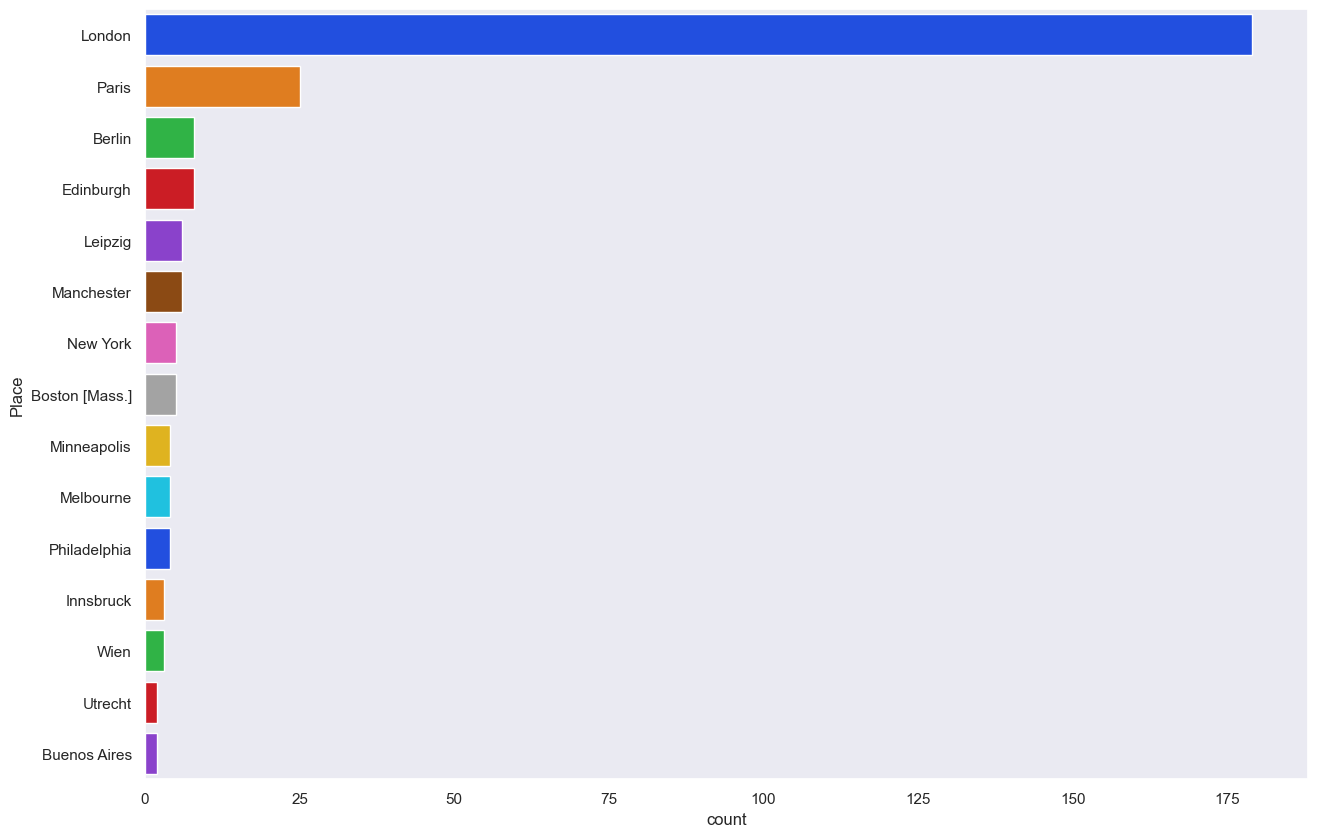

In [9]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.figure(figsize=(15,10))
sns.set(style="dark")
ax = sns.countplot(y="Place", data=df, palette="bright", order=df['Place'].value_counts().index[0:15])

# Menampilkan 10 besar nilai dari Place baris 7601-8000

In [173]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")

In [1]:
df = df.iloc[7601:8000, 1:17]
top10_Place=df.Place.value_counts().head(10)
top10_Place

NameError: name 'df' is not defined

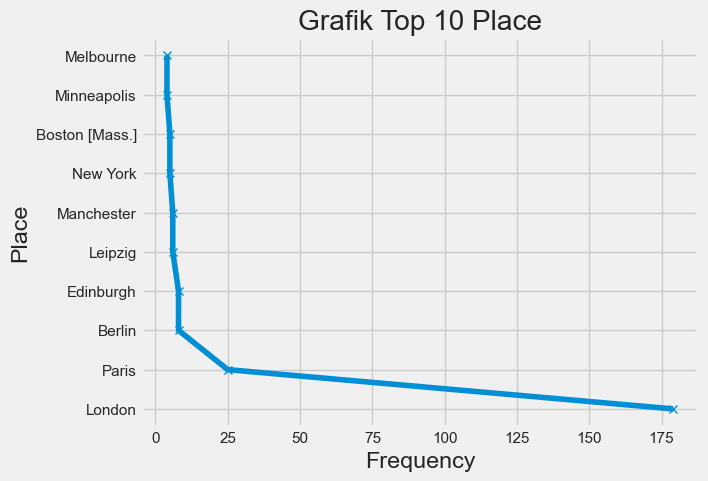

In [175]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 10:20]
plt.plot(
   top10_Place.values, top10_Place.index,
    marker = 'x'
) 

plt.title('Grafik Top 10 Place') 
plt.ylabel('Place') 
plt.xlabel('Frequency') 
plt.show()

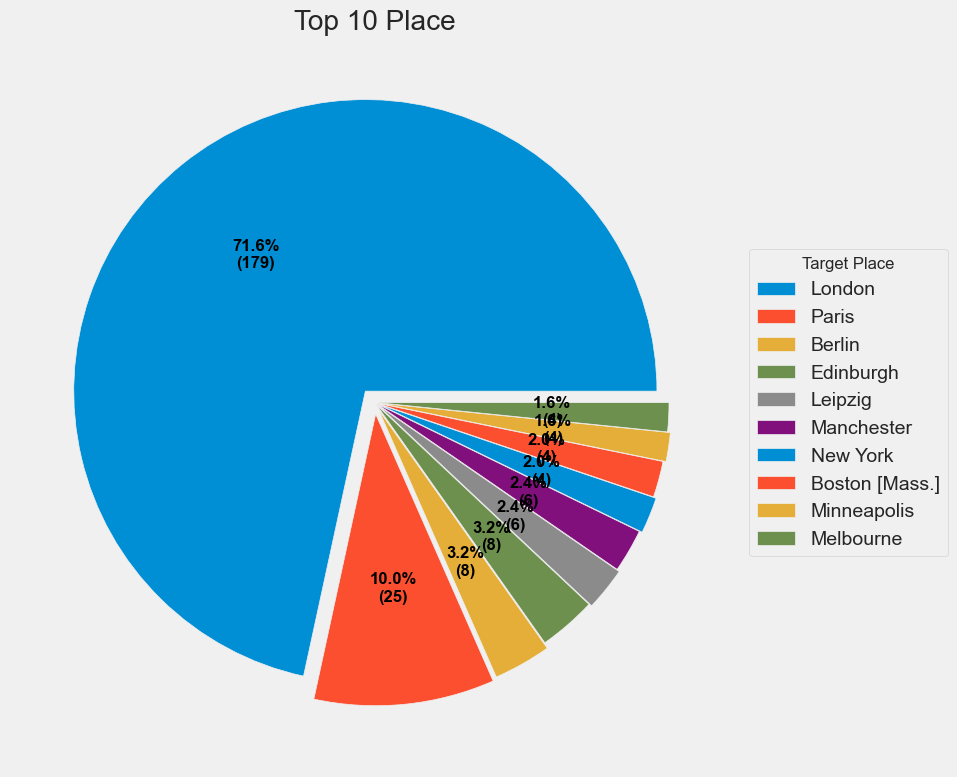

In [13]:
plt.style.use('fivethirtyeight')
explode = (0.05, 0.04, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01)
fig, ax = plt.subplots(figsize=(15,9), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(top10_Place, explode=explode, autopct=lambda pct: func(pct, top10_Place),
                                  textprops=dict(color="black",))

ax.legend(wedges, top10_Place.index,
          title="Target Place",
          loc="center left", prop={'size':14},
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top 10 Place", )

plt.show()

In [14]:
fig=px.bar(x=top10_Place.index,
           y= top10_Place.values,
           color= top10_Place.index,
           text= top10_Place.values,
           title=' Top_10_Place')
fig.update_layout(xaxis_title='Place',yaxis_title='Frequency')

# Menampilkan data Date range 7601-8000

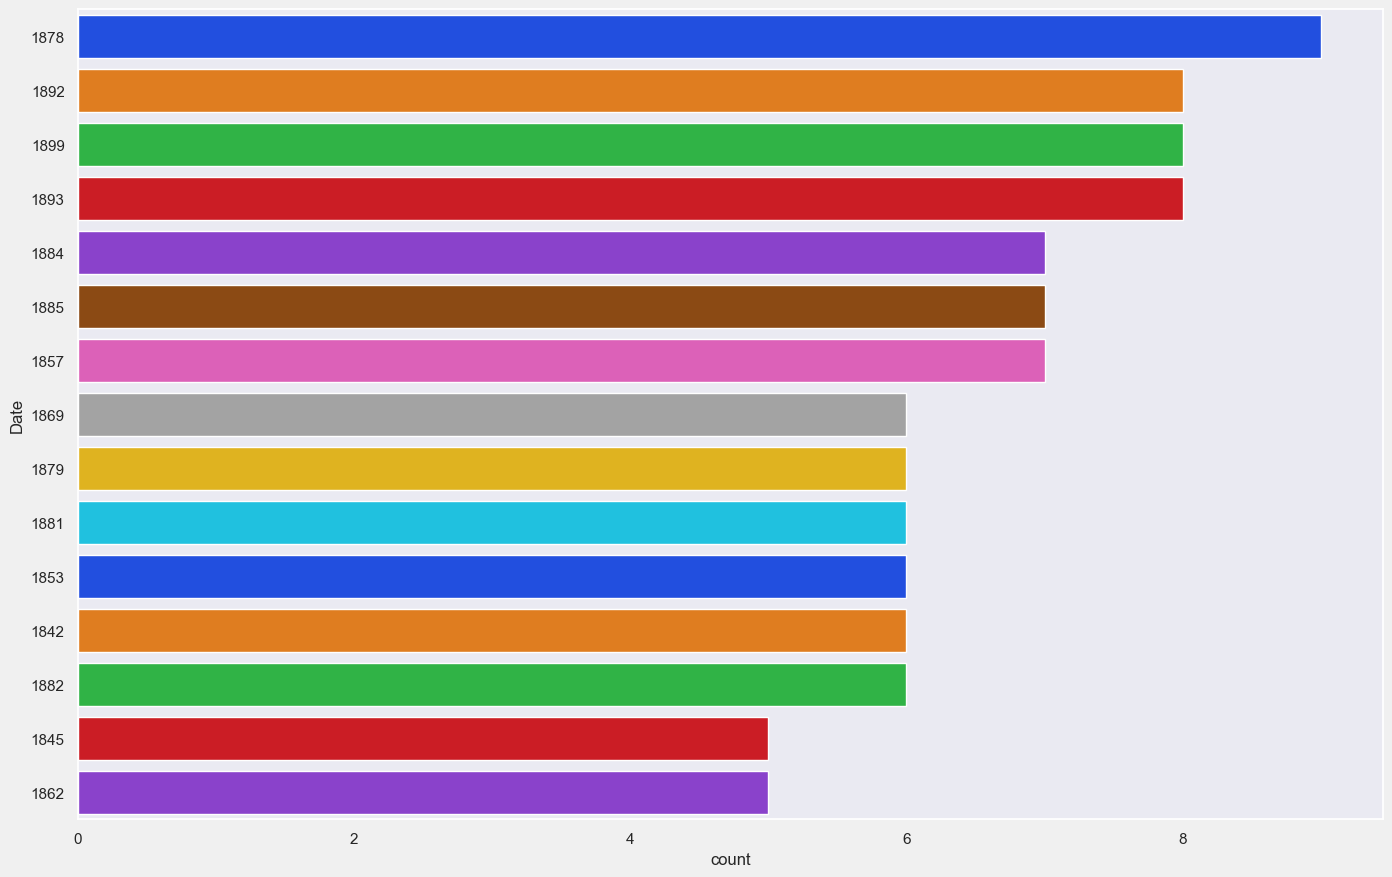

In [15]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.figure(figsize=(15,10))
sns.set(style="dark")
ax = sns.countplot(y="Date", data=df, palette="bright", order=df['Date'].value_counts().index[0:15])

# Menampilkan 10 besar nilai dari kolom Date

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from functools import reduce

In [54]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
top10_Date=df.Date.value_counts().head(10)
top10_Date

1878    9
1892    8
1899    8
1893    8
1884    7
1885    7
1857    7
1869    6
1879    6
1881    6
Name: Date, dtype: int64

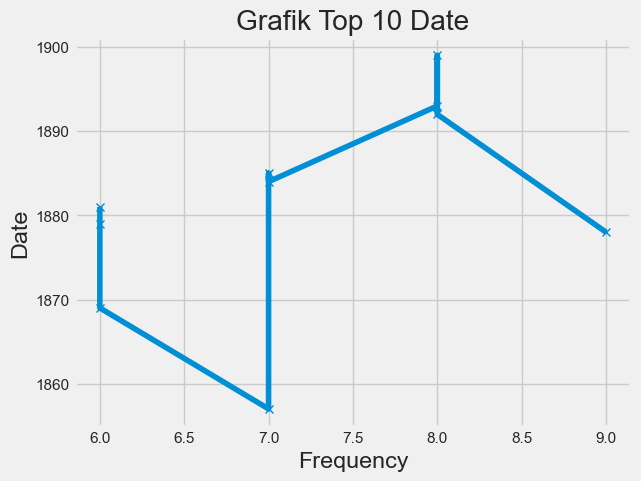

In [45]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.plot(
    top10_Date.values,
    top10_Date.index, 
    marker = 'x'
) 

plt.title('Grafik Top 10 Date') 
plt.ylabel('Date') 
plt.xlabel('Frequency') 
plt.show()

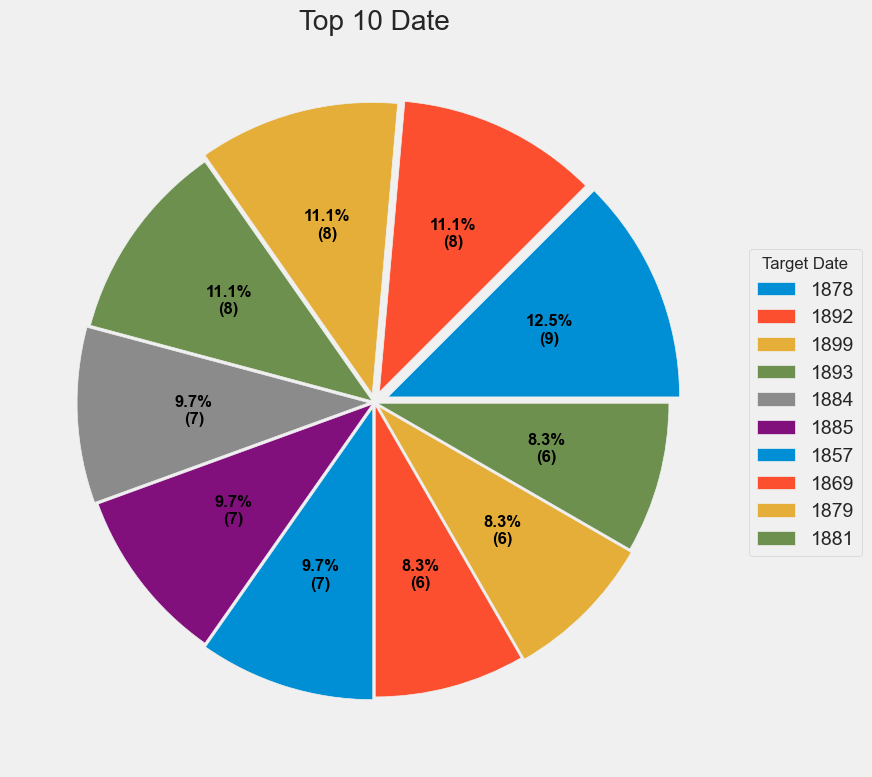

In [46]:
plt.style.use('fivethirtyeight')
explode = (0.05, 0.04, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01)
fig, ax = plt.subplots(figsize=(15,9), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(top10_Date, explode=explode, autopct=lambda pct: func(pct, top10_Date),
                                  textprops=dict(color="black",))

ax.legend(wedges, top10_Date.index,
          title="Target Date",
          loc="center left", prop={'size':14},
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top 10 Date", )

# plt.pie(top10_target, explode=explode, labels=top10_target.index, autopct='%1.1f%%', shadow=True, )
plt.show()

In [47]:
fig=px.bar(x=top10_Date.index,
           y= top10_Date.values,
           color= top10_Date.index,
           text= top10_Date.values,
           title=' Top_Date')
fig.update_layout(xaxis_title='Date',yaxis_title='Frequency')

In [142]:
df=pd.read_excel("C:/Users/ACER/Downloads/top10_Date.xlsx")
df.head()

Date  Jumlah
0  1878       9
1  1892       8
2  1899       8
3  1893       8
4  1884       7

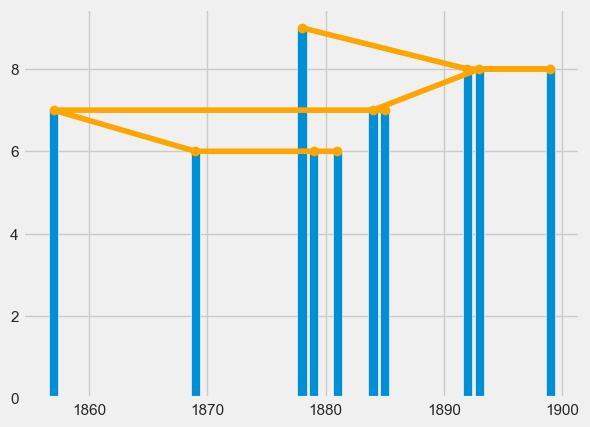

In [170]:
plt.bar(df['Date'], df['Jumlah'])
plt.plot(df['Date'], df['Jumlah'], '-o', color='orange')

# Menampilkan data Publisher dari range data 7601-8000

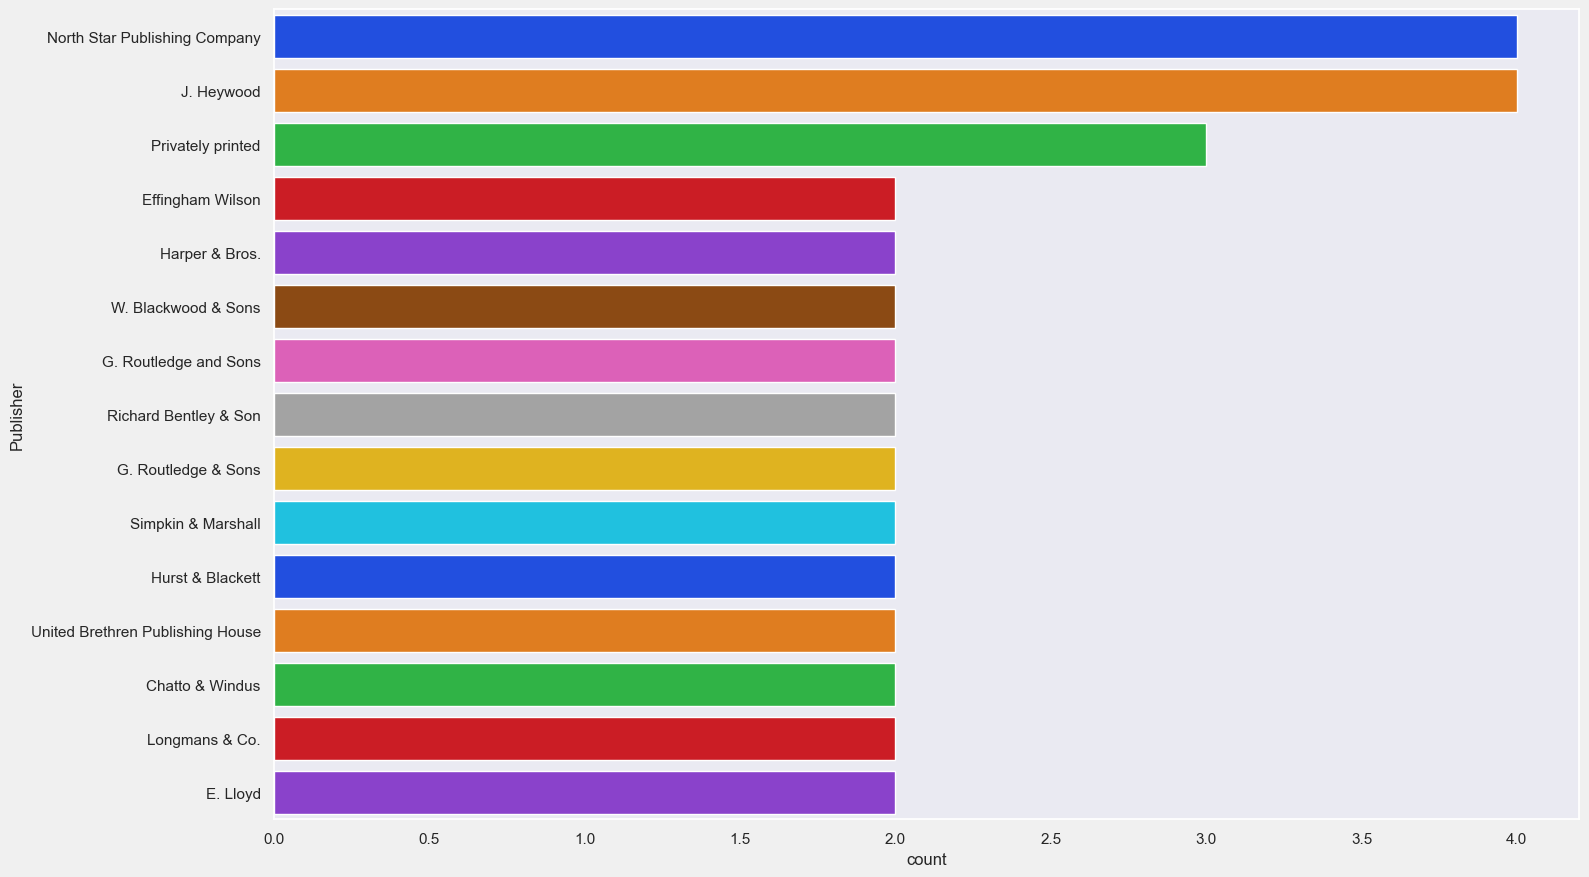

In [20]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.figure(figsize=(15,10))
sns.set(style="dark")
ax = sns.countplot(y="Publisher", data=df, palette="bright", order=df['Publisher'].value_counts().index[0:15])

# Menampilkan 10 besar nilai dari kolom Publisher

In [21]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")

In [22]:
df = df.iloc[7601:8000, 1:17]
top10_publisher=df.Publisher.value_counts().head(10)
top10_publisher

North Star Publishing Company    4
J. Heywood                       4
Privately printed                3
Effingham Wilson                 2
Harper & Bros.                   2
W. Blackwood & Sons              2
G. Routledge and Sons            2
Richard Bentley & Son            2
G. Routledge & Sons              2
Simpkin & Marshall               2
Name: Publisher, dtype: int64

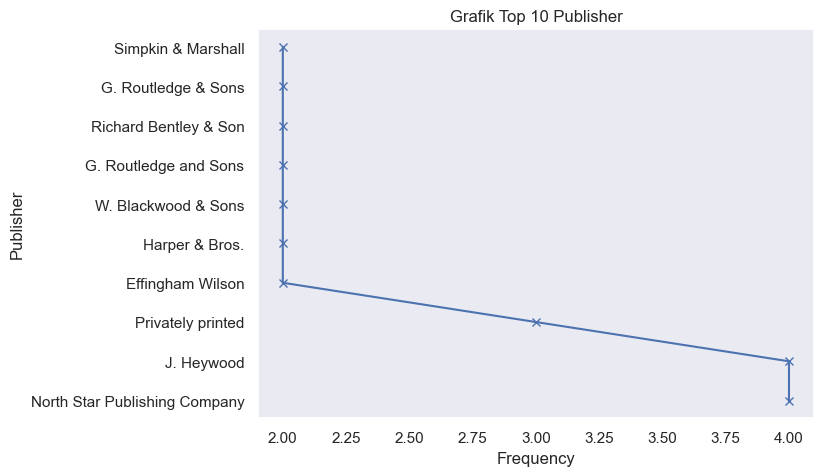

In [23]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.plot(
    top10_publisher.values,
    top10_publisher.index, 
    marker = 'x'
) 

plt.title('Grafik Top 10 Publisher') 
plt.ylabel('Publisher') 
plt.xlabel('Frequency') 
plt.show()

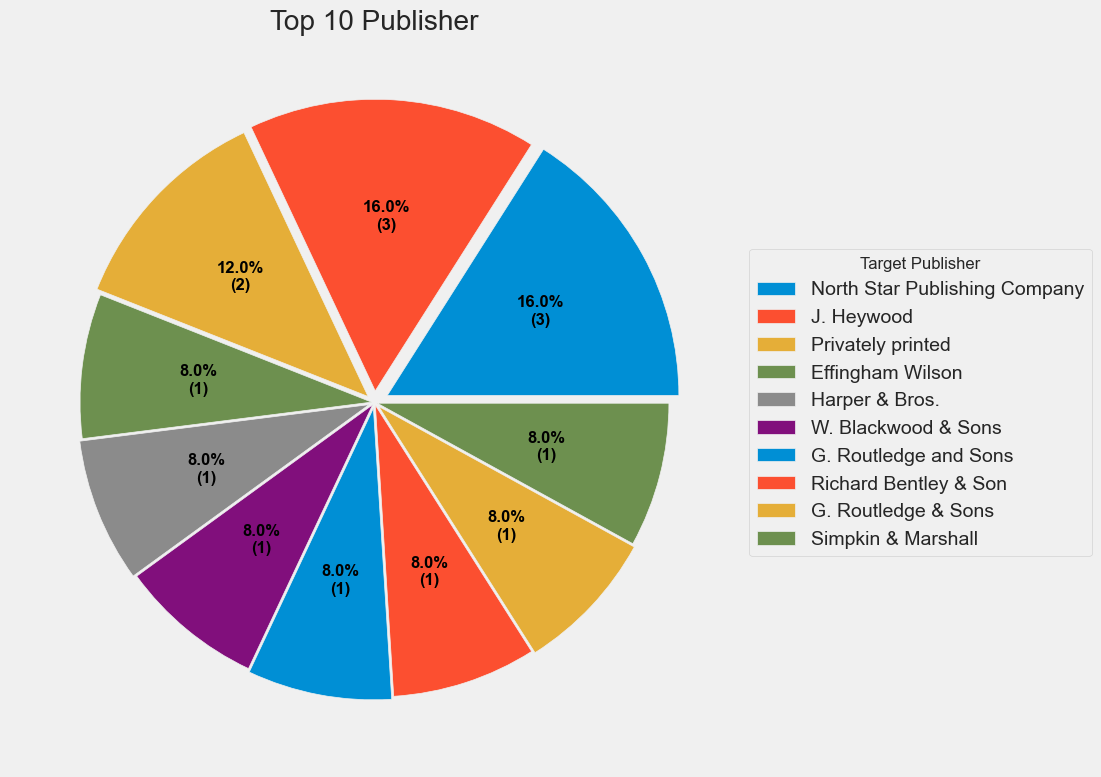

In [24]:
plt.style.use('fivethirtyeight')
explode = (0.05, 0.04, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01)
fig, ax = plt.subplots(figsize=(15,9), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(top10_publisher, explode=explode, autopct=lambda pct: func(pct, top10_publisher),
                                  textprops=dict(color="black",))

ax.legend(wedges, top10_publisher.index,
          title="Target Publisher",
          loc="center left", prop={'size':14},
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top 10 Publisher", )

# plt.pie(top10_target, explode=explode, labels=top10_target.index, autopct='%1.1f%%', shadow=True, )
plt.show()

In [25]:
fig=px.bar(x=top10_publisher.index,
           y= top10_publisher.values,
           color= top10_publisher.index,
           text= top10_publisher.values,
           title=' Top_Publisher')
fig.update_layout(xaxis_title='Publisher',yaxis_title='Frequency')

# Menampilkan data Author dari range data 7601-8000

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



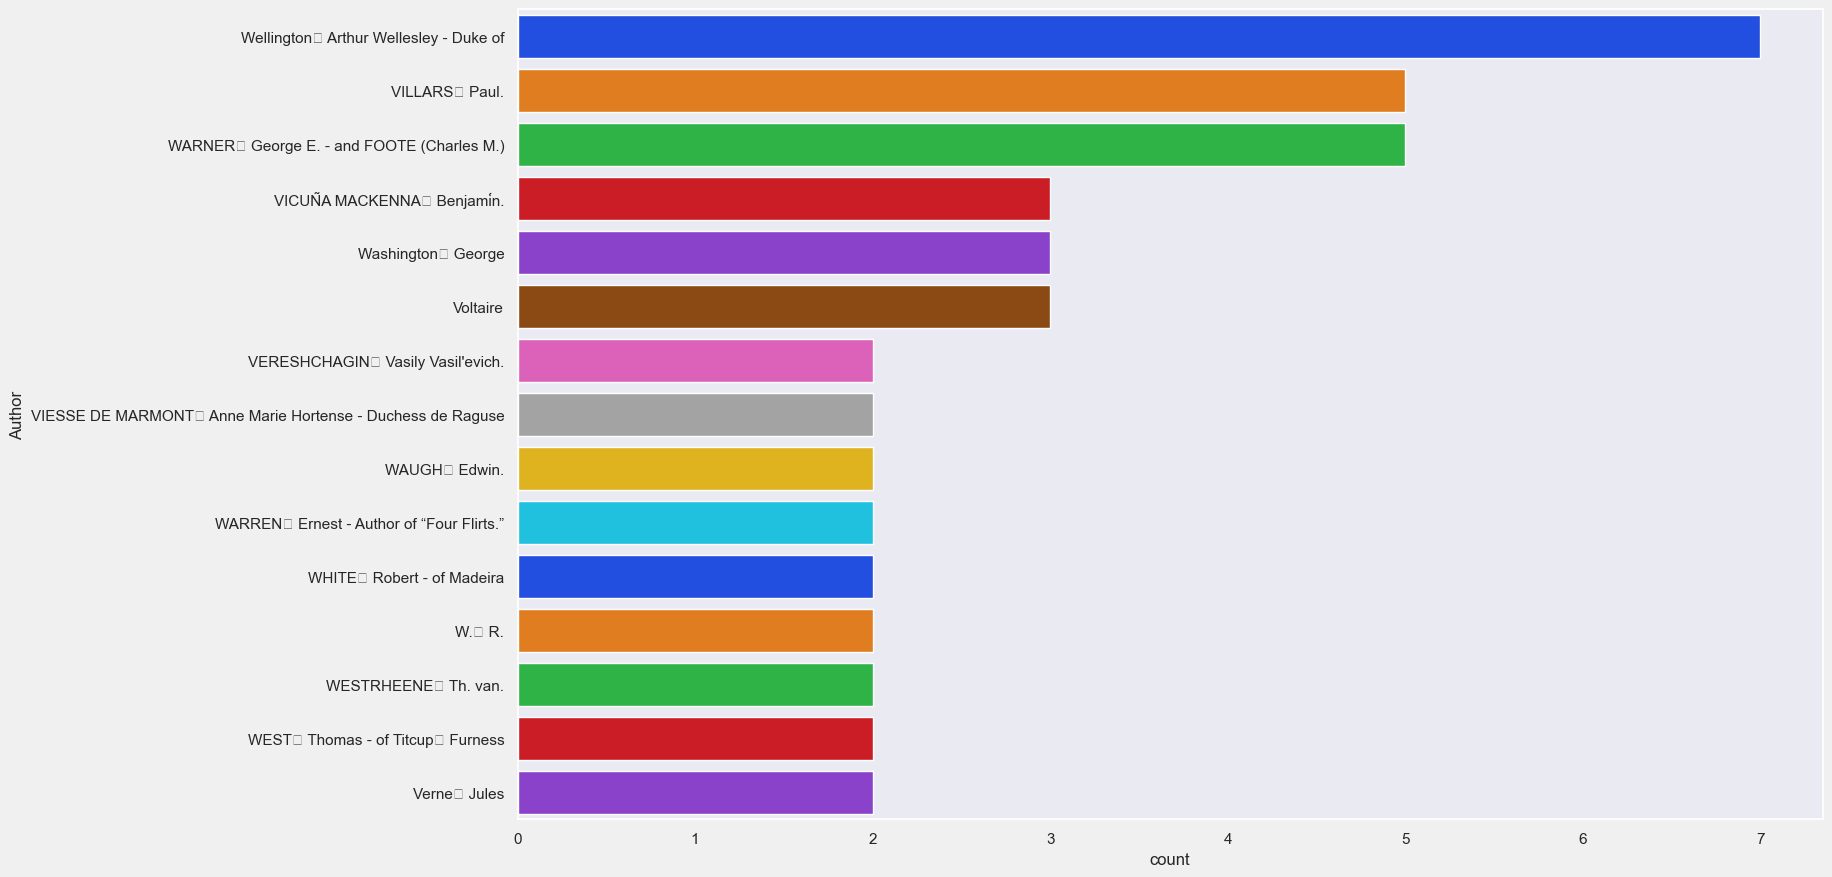

In [26]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.figure(figsize=(15,10))
sns.set(style="dark")
ax = sns.countplot(y="Author", data=df, palette="bright", order=df['Author'].value_counts().index[0:15])

# Menampilkan 10 besar nilai dari kolom Author

In [3]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
top10_Author=df.Author.value_counts().head(10)
top10_Author

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx'

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



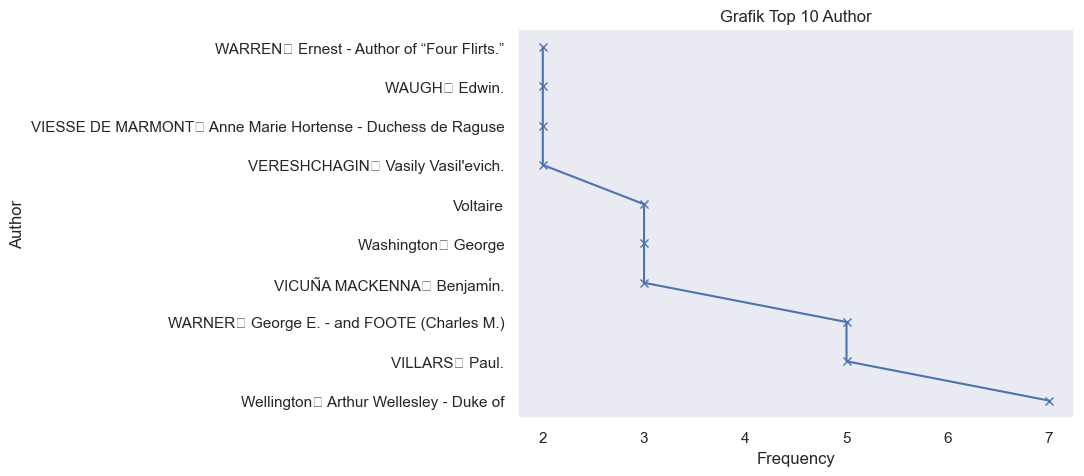

In [28]:
df=pd.read_excel("C:/Users/ACER/Downloads/BL-Flickr-Images-Book.xlsx")
df = df.iloc[7601:8000, 1:17]
plt.plot(
    top10_Author.values,
    top10_Author.index, 
    marker = 'x'
) 

plt.title('Grafik Top 10 Author') 
plt.ylabel('Author') 
plt.xlabel('Frequency') 
plt.show()

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



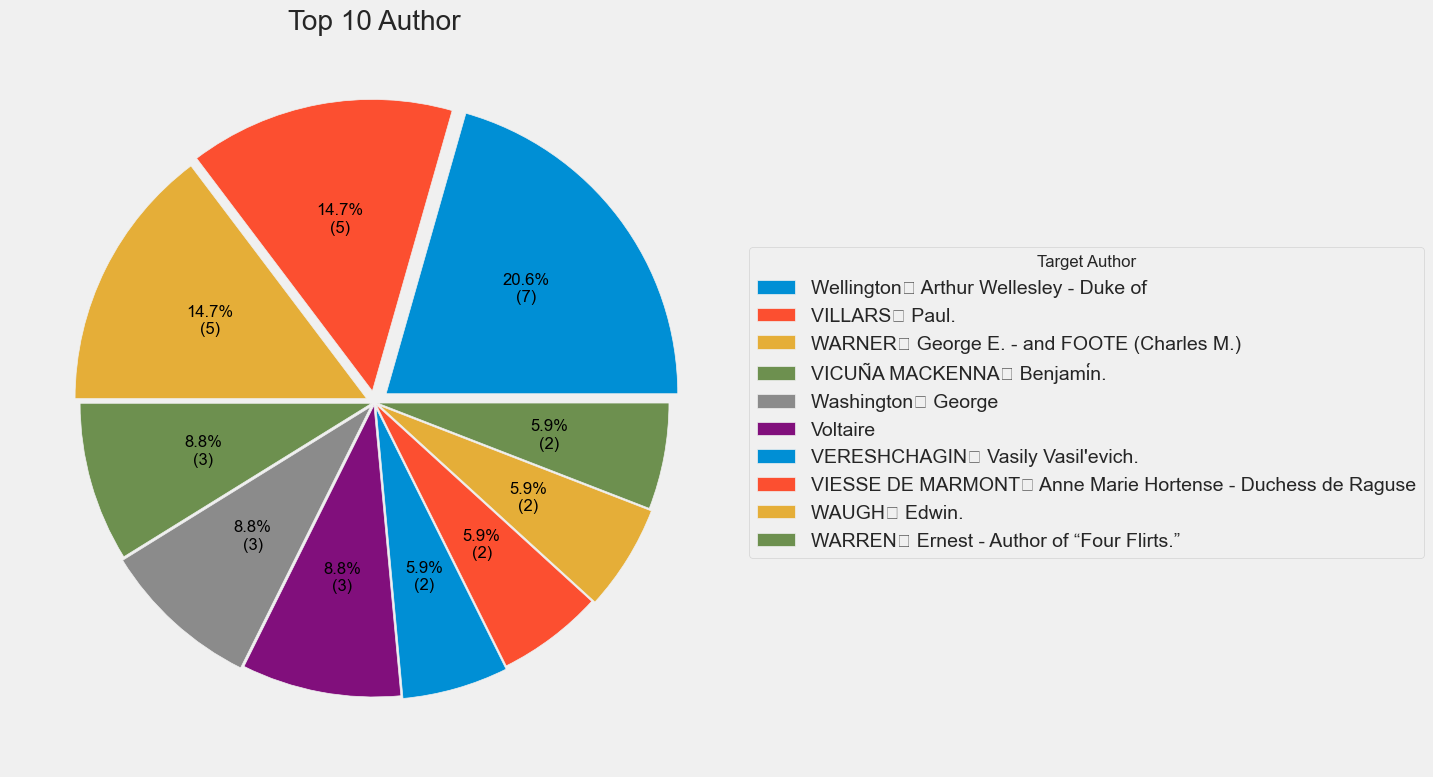

In [29]:
plt.style.use('fivethirtyeight')
explode = (0.05, 0.04, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01)
fig, ax = plt.subplots(figsize=(15,9), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(top10_Author, explode=explode, autopct=lambda pct: func(pct, top10_Author),
                                  textprops=dict(color="black",))

ax.legend(wedges, top10_Author.index,
          title="Target Author",
          loc="center left", prop={'size':14},
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12)

ax.set_title("Top 10 Author", )

# plt.pie(top10_target, explode=explode, labels=top10_target.index, autopct='%1.1f%%', shadow=True, )
plt.show()

In [30]:
fig=px.bar(x=top10_Author.index,
           y= top10_Author.values,
           color= top10_Author.index,
           text= top10_Author.values,
           title=' Top_Author')
fig.update_layout(xaxis_title='Author',yaxis_title='Frequency')

# percobaan

In [179]:
df=pd.read_excel("C:/Users/ACER/Downloads/Top10_Date.xlsx")
df.head()

Date  Jumlah
0  1878       9
1  1892       8
2  1899       8
3  1893       8
4  1884       7

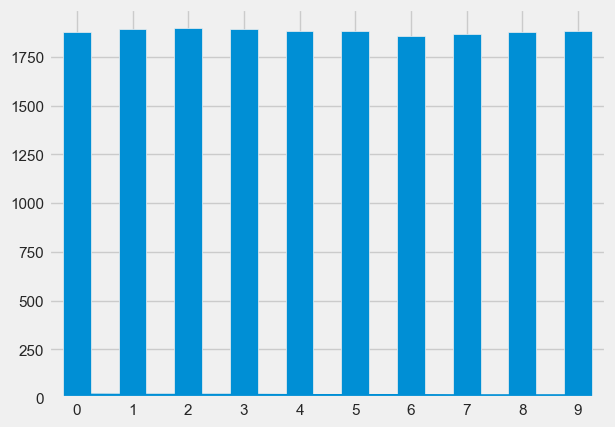

In [185]:
df['Date'].plot(kind='bar')
df['Jumlah'].plot()
plt.title('')
plt.show()

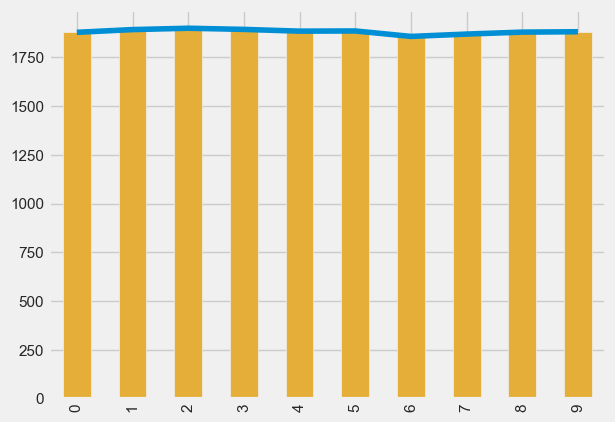

In [189]:
df.Date.plot(zorder=5)
df['Date'].plot(kind='bar', color='C2', zorder=1)
plt.title('')
plt.show()

<AxesSubplot: xlabel='Jumlah', ylabel='Date'>

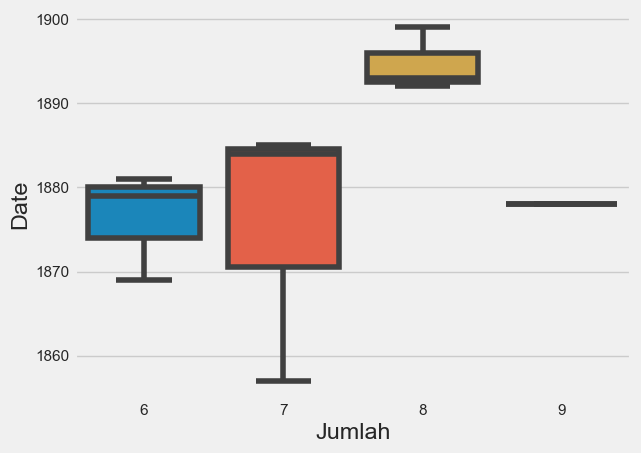

In [192]:
import seaborn as sbn

sbn.boxplot(x="Jumlah", y="Date", data=df)

<AxesSubplot: xlabel='Date', ylabel='Jumlah'>

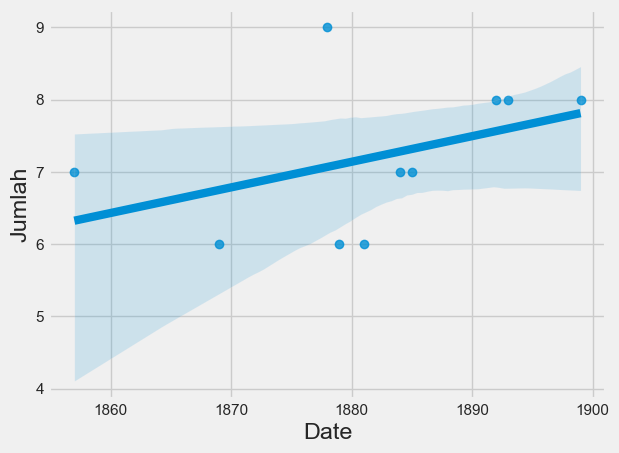

In [197]:
df=pd.read_excel("C:/Users/ACER/Downloads/Top10_Date.xlsx")
sbn.regplot(x="Date", y="Jumlah", data=df)